## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [1]:
import scipy.stats as stats

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [3]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


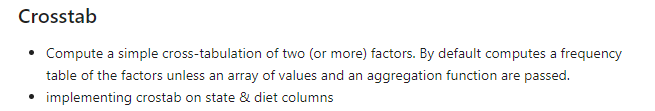

In [4]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [5]:
dataset_table.values    # observed values

array([[60, 97],
       [33, 54]], dtype=int64)

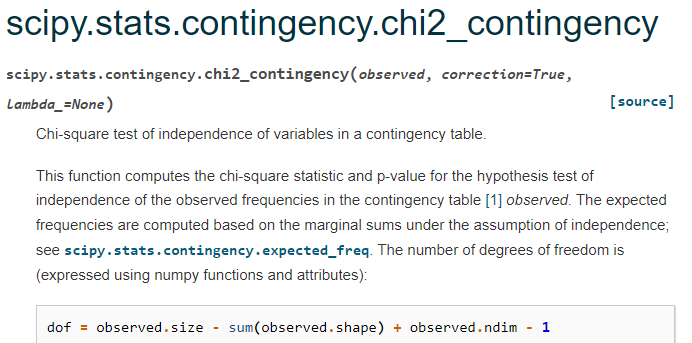

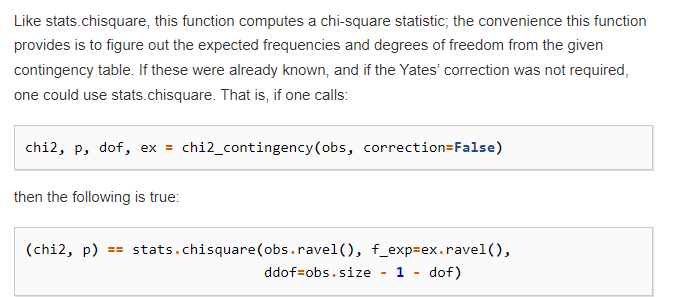

In [6]:
#Observed Values
Observed_Values = dataset_table.values      # observed values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [7]:
val=stats.chi2_contingency(dataset_table)    # computes chi-square statistics

In [8]:
val   #chi2, p, dof, expected

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [10]:
val[0], val[1], 

(0.008763290531773594, 0.925417020494423)

In [11]:
val[2], val[3], 

(1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [12]:
Expected_Values=val[3]   # find the expected values from the crosstab results
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [20]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [16]:
dataset_table.iloc[0:2,0]

sex
Male      60
Female    33
Name: Yes, dtype: int64

In [19]:
(dataset_table.iloc[0,0:2])

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [14]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)        # degrees of freedom calculation
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [15]:
print(f"no_of_rows:{no_of_rows}")
print(f"no_of_columns:{no_of_columns}")
print(f"ddof:{ddof}")

no_of_rows:2
no_of_columns:2
ddof:1


1- observed values (from the crosstab table)

2- expected values (from chi2_contingency results, which uses the crosstab table results)

3- degrees of freedom calculation

4- use the formula


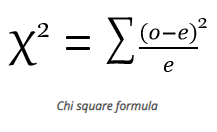

In [23]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [21]:
Observed_Values

array([[60, 97],
       [33, 54]], dtype=int64)

In [22]:
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [25]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])  # calculates chi2
chi_square_statistic=chi_square[0]+chi_square[1]

In [27]:
chi_square

array([0.00119737, 0.00073745])

In [28]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


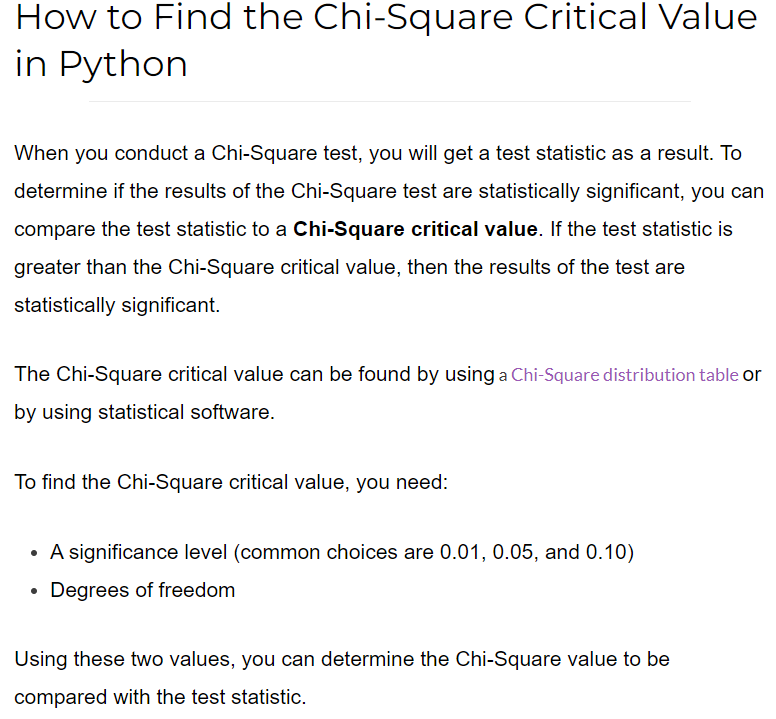

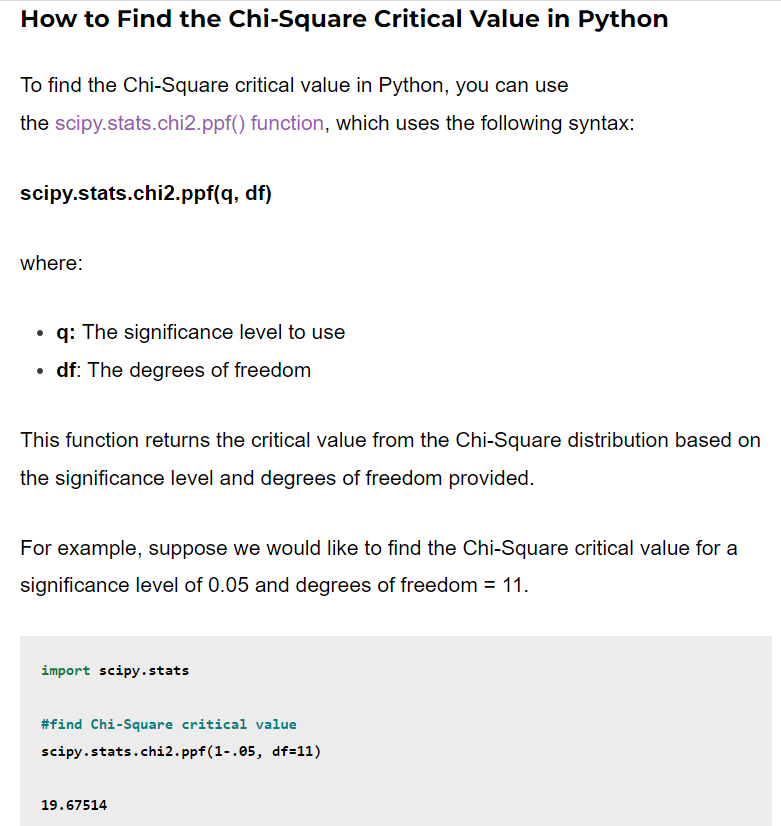

In [26]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)   # calcualtes the critical value based of degrees of freedom and C.I.
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [27]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)   # ONE minus commulative distribution to obtain the pvalue
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [28]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

##  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different

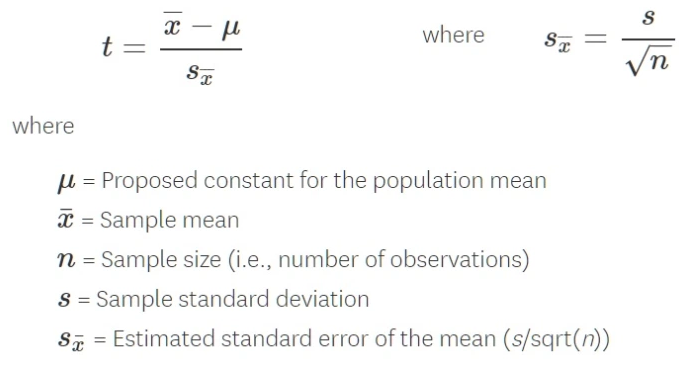

In [342]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [343]:
len(ages)

32

In [41]:
import numpy as np
ages_mean=np.mean(ages)      # calculates the mean of the dataset
print(ages_mean)

30.34375


In [344]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)   # takes 10 random samples from the dataset

In [345]:
age_sample

array([18, 10, 24, 10, 35, 55, 10, 70, 18, 28])

In [346]:
from scipy.stats import ttest_1samp              # ttest import

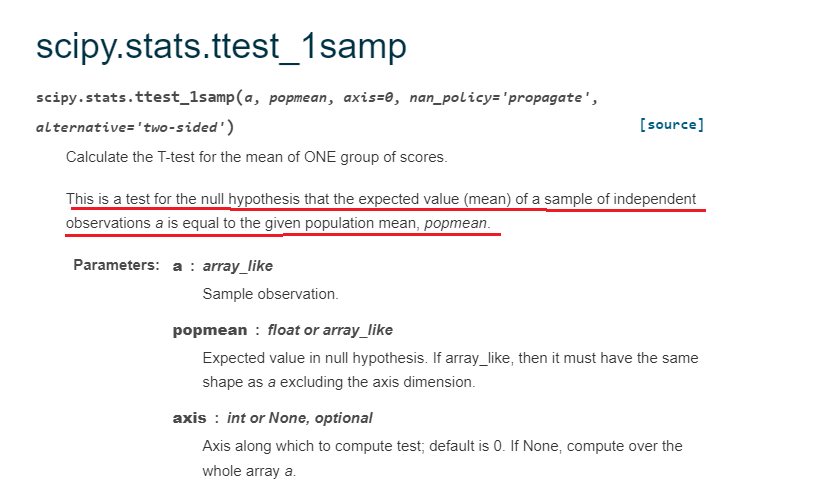

In [347]:
ttest,p_value=ttest_1samp(age_sample,30)

In [348]:
print(p_value)

0.7403808450296021


In [118]:
# Ho  mean EQUAL to 30
# H1  mean NO EQUAL to 30

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Some More Examples
Consider the age of students in a college and in Class A

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)  # loc=stand deviation, size=1500 population size
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)    # size = 60  sample size


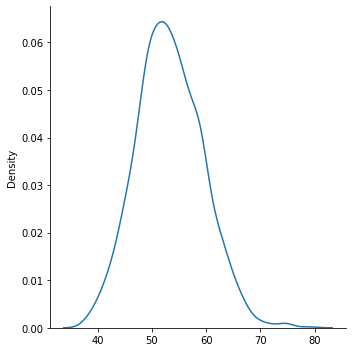

In [24]:
sns.displot(data=school_ages, kind="kde")

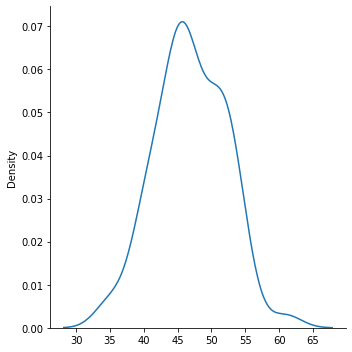

In [25]:
sns.displot(data=classA_ages, kind="kde")

In [26]:
school_ages.mean(), classA_ages.mean(),

(53.303333333333335, 46.9)

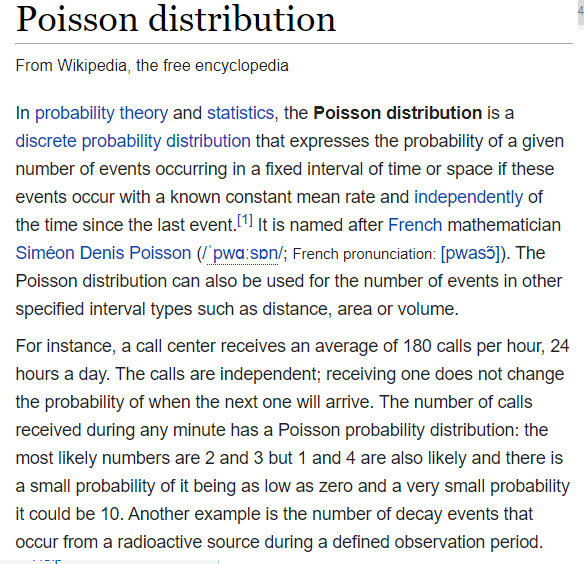

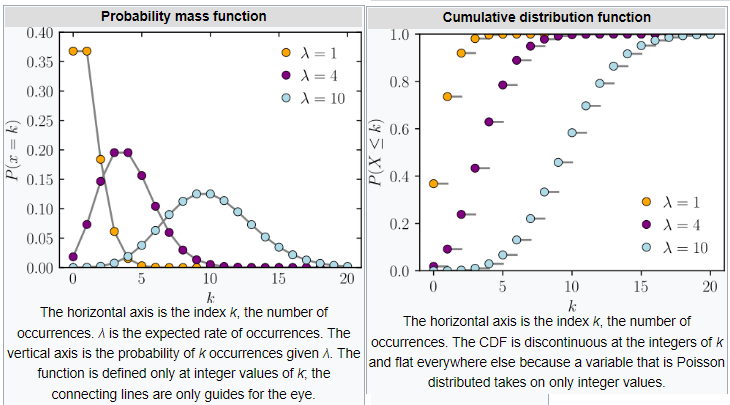

In [351]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [353]:
p_value

1.139027071016194e-13

In [352]:
school_ages.mean()

53.303333333333335

In [354]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

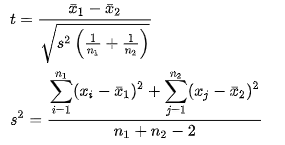

In [355]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [356]:
_,p_value=stats.ttest_ind(a=classA_height,b=ClassB_ages,equal_var=False)

In [357]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [203]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [204]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [205]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [206]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [358]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)  # paired ttest

In [359]:
print(p_value)

0.5732936534411279


In [360]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Correlation

In [27]:
import seaborn as sns
df=sns.load_dataset('iris')

In [28]:
df.shape

(150, 5)

In [29]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


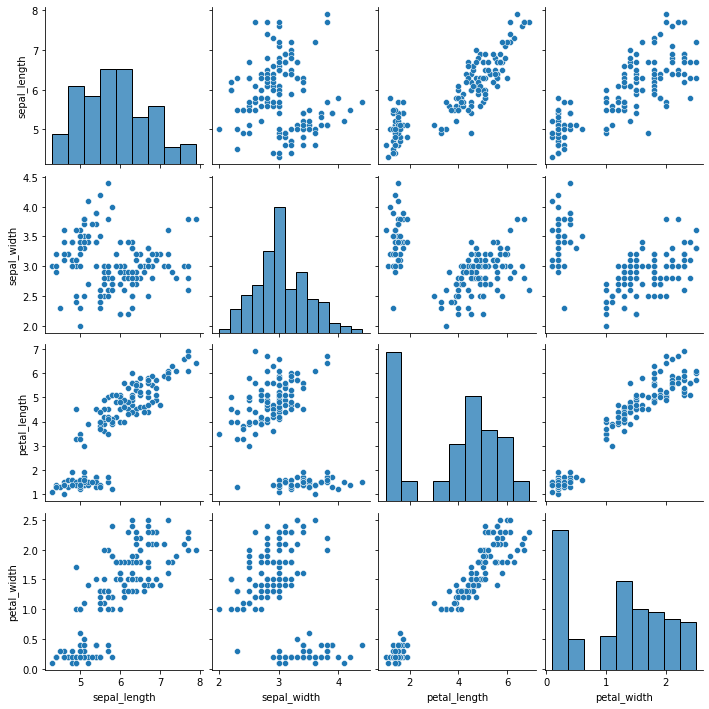

In [30]:
sns.pairplot(df)

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [31]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [32]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df_anova = df1[['petal_width','species']]

In [34]:
grps = pd.unique(df_anova.species.values)

In [35]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [291]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [292]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64, 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85   

In [293]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])  # input three parameters as dictionaries

In [294]:
print(p)

4.169445839443116e-85


In [295]:
# Ho mean(virgin) =mean(setosa) = mean(virginica)
# H1 mean(virgin) != mean(setosa) != mean(virginica)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
